In [172]:
import numpy as np
import pandas as pd
import tensorflow
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
from sklearn.datasets import make_circles

In [173]:
X,y=make_circles(n_samples=200,noise=0,random_state=2)

In [174]:
X.shape

(200, 2)

In [175]:
y.shape

(200,)

In [176]:
import matplotlib.pyplot as plt

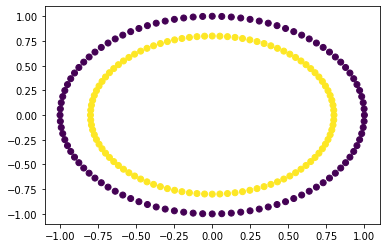

In [177]:
plt.scatter(X[:,0],X[:,1],c=y[:])
plt.show()

## **Model1 is usedfor relu function and after training we find that it converge fast as compare to tanh and sigmoid and it takes only 100 epochs to converge**





In [178]:
model1=Sequential()
model1.add(Dense(8,activation='relu',input_dim=2))
model1.add(Dense(8,activation='relu'))
model1.add(Dense(8,activation='relu'))
model1.add(Dense(8,activation='relu'))
model1.add(Dense(1,activation='sigmoid'))

In [179]:
model1.summary()

Model: "sequential_18"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_90 (Dense)            (None, 8)                 24        
                                                                 
 dense_91 (Dense)            (None, 8)                 72        
                                                                 
 dense_92 (Dense)            (None, 8)                 72        
                                                                 
 dense_93 (Dense)            (None, 8)                 72        
                                                                 
 dense_94 (Dense)            (None, 1)                 9         
                                                                 
Total params: 249
Trainable params: 249
Non-trainable params: 0
_________________________________________________________________


In [180]:
model1.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [181]:
from tensorflow.keras.callbacks import EarlyStopping

In [182]:
callback=EarlyStopping(
    monitor="val_accuracy",
    min_delta=0.00001,
    patience=20,
    verbose=1,
    mode="auto",
    baseline=None,
    restore_best_weights=False,
)

In [183]:
history1=model1.fit(X,y,epochs=100,validation_split=0.2)

Epoch 1/100
5/5 [==============================] - 1s 73ms/step - loss: 0.6981 - accuracy: 0.5188 - val_loss: 0.7060 - val_accuracy: 0.4250
Epoch 2/100
5/5 [==============================] - 0s 16ms/step - loss: 0.6973 - accuracy: 0.5188 - val_loss: 0.7054 - val_accuracy: 0.4250
Epoch 3/100
5/5 [==============================] - 0s 18ms/step - loss: 0.6965 - accuracy: 0.5188 - val_loss: 0.7051 - val_accuracy: 0.4250
Epoch 4/100
5/5 [==============================] - 0s 14ms/step - loss: 0.6960 - accuracy: 0.5188 - val_loss: 0.7047 - val_accuracy: 0.4250
Epoch 5/100
5/5 [==============================] - 0s 19ms/step - loss: 0.6954 - accuracy: 0.5188 - val_loss: 0.7045 - val_accuracy: 0.4250
Epoch 6/100
5/5 [==============================] - 0s 23ms/step - loss: 0.6952 - accuracy: 0.5188 - val_loss: 0.7041 - val_accuracy: 0.4250
Epoch 7/100
5/5 [==============================] - 0s 14ms/step - loss: 0.6948 - accuracy: 0.5188 - val_loss: 0.7038 - val_accuracy: 0.4250
Epoch 8/100
5/5 [===

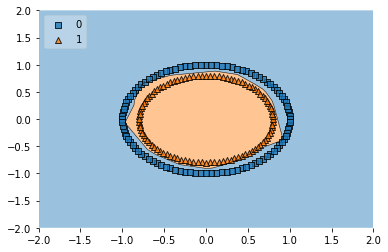

In [184]:
from mlxtend.plotting import plot_decision_regions
plot_decision_regions(X,y.astype('int'),clf=model1,legend=2)

# **Model2 is used as tanh function and it conveverge slow as compare to relu and it takes 300 epochs for trainging**

In [185]:
model2=Sequential()
model2.add(Dense(8,activation='tanh',input_dim=2))
model2.add(Dense(8,activation='tanh'))
model2.add(Dense(8,activation='tanh'))
model2.add(Dense(8,activation='tanh'))
model2.add(Dense(1,activation='sigmoid'))

In [186]:
model2.summary()

Model: "sequential_19"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_95 (Dense)            (None, 8)                 24        
                                                                 
 dense_96 (Dense)            (None, 8)                 72        
                                                                 
 dense_97 (Dense)            (None, 8)                 72        
                                                                 
 dense_98 (Dense)            (None, 8)                 72        
                                                                 
 dense_99 (Dense)            (None, 1)                 9         
                                                                 
Total params: 249
Trainable params: 249
Non-trainable params: 0
_________________________________________________________________


In [187]:
model2.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [188]:
history2=model2.fit(X,y,epochs=300,validation_split=0.2)

Epoch 1/300
5/5 [==============================] - 1s 67ms/step - loss: 0.7017 - accuracy: 0.5312 - val_loss: 0.7747 - val_accuracy: 0.4000
Epoch 2/300
5/5 [==============================] - 0s 17ms/step - loss: 0.6981 - accuracy: 0.5312 - val_loss: 0.7658 - val_accuracy: 0.3750
Epoch 3/300
5/5 [==============================] - 0s 12ms/step - loss: 0.6945 - accuracy: 0.5375 - val_loss: 0.7592 - val_accuracy: 0.3750
Epoch 4/300
5/5 [==============================] - 0s 15ms/step - loss: 0.6926 - accuracy: 0.5375 - val_loss: 0.7548 - val_accuracy: 0.3500
Epoch 5/300
5/5 [==============================] - 0s 13ms/step - loss: 0.6912 - accuracy: 0.5375 - val_loss: 0.7487 - val_accuracy: 0.3500
Epoch 6/300
5/5 [==============================] - 0s 18ms/step - loss: 0.6891 - accuracy: 0.5375 - val_loss: 0.7451 - val_accuracy: 0.3500
Epoch 7/300
5/5 [==============================] - 0s 13ms/step - loss: 0.6887 - accuracy: 0.5437 - val_loss: 0.7434 - val_accuracy: 0.3500
Epoch 8/300
5/5 [===

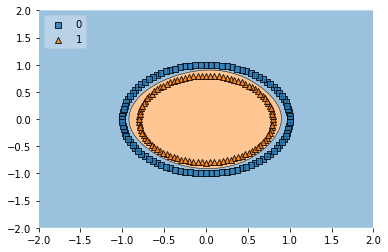

In [189]:
from mlxtend.plotting import plot_decision_regions
plot_decision_regions(X,y.astype('int'),clf=model2,legend=2)

## **Model3 is used for the relu function with small random weight initialiization and we found that it converge but take 500 epochs and it has not gradient decent. It has only one problem that it converge slow**

# **Sometimes it is also not converge**

In [190]:
model3=Sequential()
model3.add(Dense(8,activation='relu',input_dim=2))
model3.add(Dense(8,activation='relu'))
model3.add(Dense(8,activation='relu'))
model3.add(Dense(8,activation='relu'))
model3.add(Dense(1,activation='sigmoid'))

In [191]:
model3.summary()

Model: "sequential_20"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_100 (Dense)           (None, 8)                 24        
                                                                 
 dense_101 (Dense)           (None, 8)                 72        
                                                                 
 dense_102 (Dense)           (None, 8)                 72        
                                                                 
 dense_103 (Dense)           (None, 8)                 72        
                                                                 
 dense_104 (Dense)           (None, 1)                 9         
                                                                 
Total params: 249
Trainable params: 249
Non-trainable params: 0
_________________________________________________________________


In [192]:
model3.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [193]:
# history=model.fit(X,y,epochs=100,validation_split=0.2)
initial_weight3=model3.get_weights()

In [194]:
len(initial_weight3)

10

In [195]:
initial_weight3[0]=np.random.randn(initial_weight3[0].shape[0],initial_weight3[0].shape[1])*0.01
initial_weight3[1]=np.zeros(initial_weight3[1].shape)
initial_weight3[2]=np.random.randn(initial_weight3[2].shape[0],initial_weight3[2].shape[1])*0.01
initial_weight3[3]=np.zeros(initial_weight3[3].shape)
initial_weight3[4]=np.random.randn(initial_weight3[4].shape[0],initial_weight3[4].shape[1])*0.01
initial_weight3[5]=np.zeros(initial_weight3[5].shape)
initial_weight3[6]=np.random.randn(initial_weight3[6].shape[0],initial_weight3[6].shape[1])*0.01
initial_weight3[7]=np.zeros(initial_weight3[7].shape)
initial_weight3[8]=np.random.randn(initial_weight3[8].shape[0],initial_weight3[8].shape[1])*0.01
initial_weight3[9]=np.zeros(initial_weight3[9].shape)



In [196]:
print(initial_weight3[0].shape)
print(initial_weight3[1].shape)
print(initial_weight3[2].shape)
print(initial_weight3[3].shape)
print(initial_weight3[4].shape)
print(initial_weight3[5].shape)
print(initial_weight3[6].shape)
print(initial_weight3[7].shape)
print(initial_weight3[8].shape)
print(initial_weight3[9].shape)


(2, 8)
(8,)
(8, 8)
(8,)
(8, 8)
(8,)
(8, 8)
(8,)
(8, 1)
(1,)


In [197]:
print(model3.get_weights()[0].shape)
print(model3.get_weights()[1].shape)
print(model3.get_weights()[2].shape)
print(model3.get_weights()[3].shape)
print(model3.get_weights()[4].shape)
print(model3.get_weights()[5].shape)
print(model3.get_weights()[6].shape)
print(model3.get_weights()[7].shape)
print(model3.get_weights()[8].shape)
print(model3.get_weights()[9].shape)

(2, 8)
(8,)
(8, 8)
(8,)
(8, 8)
(8,)
(8, 8)
(8,)
(8, 1)
(1,)


In [198]:
model3.set_weights(initial_weight3)

In [199]:
#model3.get_weights()

In [200]:
history3=model3.fit(X,y,epochs=500,validation_split=0.2)

Epoch 1/500
5/5 [==============================] - 1s 61ms/step - loss: 0.6932 - accuracy: 0.4812 - val_loss: 0.6931 - val_accuracy: 0.5750
Epoch 2/500
5/5 [==============================] - 0s 15ms/step - loss: 0.6932 - accuracy: 0.4812 - val_loss: 0.6931 - val_accuracy: 0.5750
Epoch 3/500
5/5 [==============================] - 0s 12ms/step - loss: 0.6932 - accuracy: 0.4688 - val_loss: 0.6933 - val_accuracy: 0.4250
Epoch 4/500
5/5 [==============================] - 0s 12ms/step - loss: 0.6931 - accuracy: 0.5188 - val_loss: 0.6934 - val_accuracy: 0.4250
Epoch 5/500
5/5 [==============================] - 0s 11ms/step - loss: 0.6931 - accuracy: 0.5188 - val_loss: 0.6935 - val_accuracy: 0.4250
Epoch 6/500
5/5 [==============================] - 0s 12ms/step - loss: 0.6931 - accuracy: 0.5188 - val_loss: 0.6936 - val_accuracy: 0.4250
Epoch 7/500
5/5 [==============================] - 0s 15ms/step - loss: 0.6930 - accuracy: 0.5188 - val_loss: 0.6937 - val_accuracy: 0.4250
Epoch 8/500
5/5 [===

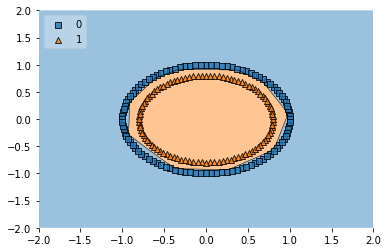

In [201]:
from mlxtend.plotting import plot_decision_regions
plot_decision_regions(X,y.astype('int'),clf=model3,legend=2)

# **Model4 is used for the tanh activation function with small weight initialization and it has found gradient decent problem and even we have given 500 epochs but not converge**

In [202]:
model4=Sequential()
model4.add(Dense(8,activation='tanh',input_dim=2))
model4.add(Dense(8,activation='tanh'))
model4.add(Dense(8,activation='tanh'))
model4.add(Dense(8,activation='tanh'))
model4.add(Dense(1,activation='sigmoid'))

In [203]:
model4.summary()

Model: "sequential_21"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_105 (Dense)           (None, 8)                 24        
                                                                 
 dense_106 (Dense)           (None, 8)                 72        
                                                                 
 dense_107 (Dense)           (None, 8)                 72        
                                                                 
 dense_108 (Dense)           (None, 8)                 72        
                                                                 
 dense_109 (Dense)           (None, 1)                 9         
                                                                 
Total params: 249
Trainable params: 249
Non-trainable params: 0
_________________________________________________________________


In [204]:
model4.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [205]:
initial_weight4=model4.get_weights()

In [206]:
initial_weight4[0]=np.random.randn(initial_weight4[0].shape[0],initial_weight4[0].shape[1])*0.01
initial_weight4[1]=np.zeros(initial_weight4[1].shape)
initial_weight4[2]=np.random.randn(initial_weight4[2].shape[0],initial_weight4[2].shape[1])*0.01
initial_weight4[3]=np.zeros(initial_weight4[3].shape)
initial_weight4[4]=np.random.randn(initial_weight4[4].shape[0],initial_weight4[4].shape[1])*0.01
initial_weight4[5]=np.zeros(initial_weight4[5].shape)
initial_weight4[6]=np.random.randn(initial_weight4[6].shape[0],initial_weight4[6].shape[1])*0.01
initial_weight4[7]=np.zeros(initial_weight4[7].shape)
initial_weight4[8]=np.random.randn(initial_weight4[8].shape[0],initial_weight4[8].shape[1])*0.01
initial_weight4[9]=np.zeros(initial_weight4[9].shape)



In [207]:
model4.set_weights(initial_weight4)

In [208]:
history4=model4.fit(X,y,epochs=500,validation_split=0.2)

Epoch 1/500
5/5 [==============================] - 1s 65ms/step - loss: 0.6931 - accuracy: 0.4812 - val_loss: 0.6933 - val_accuracy: 0.4250
Epoch 2/500
5/5 [==============================] - 0s 14ms/step - loss: 0.6931 - accuracy: 0.5188 - val_loss: 0.6934 - val_accuracy: 0.4250
Epoch 3/500
5/5 [==============================] - 0s 17ms/step - loss: 0.6931 - accuracy: 0.5188 - val_loss: 0.6935 - val_accuracy: 0.4250
Epoch 4/500
5/5 [==============================] - 0s 13ms/step - loss: 0.6931 - accuracy: 0.5188 - val_loss: 0.6936 - val_accuracy: 0.4250
Epoch 5/500
5/5 [==============================] - 0s 11ms/step - loss: 0.6930 - accuracy: 0.5188 - val_loss: 0.6938 - val_accuracy: 0.4250
Epoch 6/500
5/5 [==============================] - 0s 11ms/step - loss: 0.6930 - accuracy: 0.5188 - val_loss: 0.6938 - val_accuracy: 0.4250
Epoch 7/500
5/5 [==============================] - 0s 13ms/step - loss: 0.6930 - accuracy: 0.5188 - val_loss: 0.6940 - val_accuracy: 0.4250
Epoch 8/500
5/5 [===

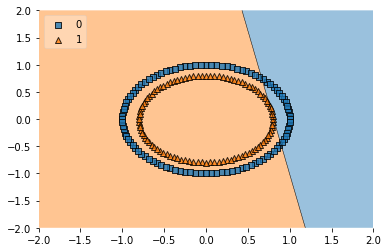

In [209]:
from mlxtend.plotting import plot_decision_regions
plot_decision_regions(X,y.astype('int'),clf=model4,legend=2)

## **This model is used for sigmoid activation function and we found that it has vanishing gradient decent problem and not converge**

In [210]:
model5=Sequential()
model5.add(Dense(8,activation='sigmoid',input_dim=2))
model5.add(Dense(8,activation='sigmoid'))
model5.add(Dense(8,activation='sigmoid'))
model5.add(Dense(8,activation='sigmoid'))
model5.add(Dense(1,activation='sigmoid'))

In [211]:
model5.summary()

Model: "sequential_22"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_110 (Dense)           (None, 8)                 24        
                                                                 
 dense_111 (Dense)           (None, 8)                 72        
                                                                 
 dense_112 (Dense)           (None, 8)                 72        
                                                                 
 dense_113 (Dense)           (None, 8)                 72        
                                                                 
 dense_114 (Dense)           (None, 1)                 9         
                                                                 
Total params: 249
Trainable params: 249
Non-trainable params: 0
_________________________________________________________________


In [212]:
model5.compile(optimizer='adam',metrics=['accuracy'],loss='binary_crossentropy')

In [213]:
model5.fit(X,y,epochs=500,validation_split=0.2)

Epoch 1/500
5/5 [==============================] - 1s 72ms/step - loss: 0.7019 - accuracy: 0.5188 - val_loss: 0.7278 - val_accuracy: 0.4250
Epoch 2/500
5/5 [==============================] - 0s 14ms/step - loss: 0.6985 - accuracy: 0.5188 - val_loss: 0.7256 - val_accuracy: 0.4250
Epoch 3/500
5/5 [==============================] - 0s 16ms/step - loss: 0.6980 - accuracy: 0.5188 - val_loss: 0.7215 - val_accuracy: 0.4250
Epoch 4/500
5/5 [==============================] - 0s 18ms/step - loss: 0.6964 - accuracy: 0.5188 - val_loss: 0.7181 - val_accuracy: 0.4250
Epoch 5/500
5/5 [==============================] - 0s 14ms/step - loss: 0.6959 - accuracy: 0.5188 - val_loss: 0.7146 - val_accuracy: 0.4250
Epoch 6/500
5/5 [==============================] - 0s 14ms/step - loss: 0.6944 - accuracy: 0.5188 - val_loss: 0.7127 - val_accuracy: 0.4250
Epoch 7/500
5/5 [==============================] - 0s 11ms/step - loss: 0.6939 - accuracy: 0.5188 - val_loss: 0.7107 - val_accuracy: 0.4250
Epoch 8/500
5/5 [===

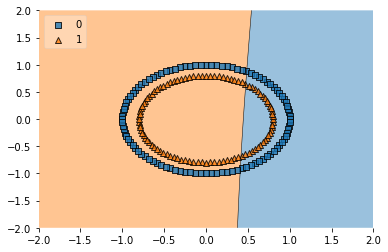

In [214]:
from mlxtend.plotting import plot_decision_regions
plot_decision_regions(X,y.astype('int'),clf=model5,legend=2)

## **Model6 is used for sigmoid with small weight intitialization and we found that it has vanishing gradient problem and it is not converginging after running till 500 epochs**

In [215]:
model6=Sequential()
model6.add(Dense(8,activation='sigmoid',input_dim=2))
model6.add(Dense(8,activation='sigmoid'))
model6.add(Dense(8,activation='sigmoid'))
model6.add(Dense(8,activation='sigmoid'))
model6.add(Dense(1,activation='sigmoid'))

In [216]:
model6.summary()

Model: "sequential_23"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_115 (Dense)           (None, 8)                 24        
                                                                 
 dense_116 (Dense)           (None, 8)                 72        
                                                                 
 dense_117 (Dense)           (None, 8)                 72        
                                                                 
 dense_118 (Dense)           (None, 8)                 72        
                                                                 
 dense_119 (Dense)           (None, 1)                 9         
                                                                 
Total params: 249
Trainable params: 249
Non-trainable params: 0
_________________________________________________________________


In [217]:
model6.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [218]:
initial_weight6=model6.get_weights()

In [219]:
initial_weight6[0]=np.random.randn(initial_weight6[0].shape[0],initial_weight6[0].shape[1])*0.01
initial_weight6[1]=np.zeros(initial_weight6[1].shape)
initial_weight6[2]=np.random.randn(initial_weight6[2].shape[0],initial_weight6[2].shape[1])*0.01
initial_weight6[3]=np.zeros(initial_weight6[3].shape)
initial_weight6[4]=np.random.randn(initial_weight6[4].shape[0],initial_weight6[4].shape[1])*0.01
initial_weight6[5]=np.zeros(initial_weight6[5].shape)
initial_weight6[6]=np.random.randn(initial_weight6[6].shape[0],initial_weight6[6].shape[1])*0.01
initial_weight6[7]=np.zeros(initial_weight6[7].shape)
initial_weight6[8]=np.random.randn(initial_weight6[8].shape[0],initial_weight6[8].shape[1])*0.01
initial_weight6[9]=np.zeros(initial_weight6[9].shape)



In [220]:
model6.set_weights(initial_weight6)

In [221]:
history6=model6.fit(X,y,epochs=500,validation_split=0.2)

Epoch 1/500
5/5 [==============================] - 1s 55ms/step - loss: 0.6929 - accuracy: 0.5188 - val_loss: 0.6952 - val_accuracy: 0.4250
Epoch 2/500
5/5 [==============================] - 0s 11ms/step - loss: 0.6928 - accuracy: 0.5188 - val_loss: 0.6953 - val_accuracy: 0.4250
Epoch 3/500
5/5 [==============================] - 0s 16ms/step - loss: 0.6928 - accuracy: 0.5188 - val_loss: 0.6953 - val_accuracy: 0.4250
Epoch 4/500
5/5 [==============================] - 0s 11ms/step - loss: 0.6928 - accuracy: 0.5188 - val_loss: 0.6959 - val_accuracy: 0.4250
Epoch 5/500
5/5 [==============================] - 0s 13ms/step - loss: 0.6927 - accuracy: 0.5188 - val_loss: 0.6960 - val_accuracy: 0.4250
Epoch 6/500
5/5 [==============================] - 0s 10ms/step - loss: 0.6928 - accuracy: 0.5188 - val_loss: 0.6967 - val_accuracy: 0.4250
Epoch 7/500
5/5 [==============================] - 0s 11ms/step - loss: 0.6926 - accuracy: 0.5188 - val_loss: 0.6970 - val_accuracy: 0.4250
Epoch 8/500
5/5 [===

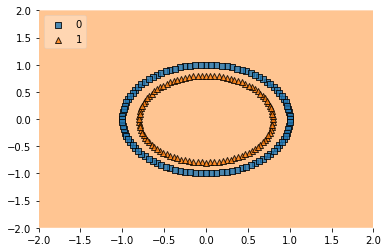

In [222]:
from mlxtend.plotting import plot_decision_regions
plot_decision_regions(X,y.astype('int'),clf=model6,legend=2)